# Analyzing Possum Age

Dataset: https://www.kaggle.com/datasets/abrambeyer/openintro-possum

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
possum = pd.read_csv("possum.csv")
df = possum.copy()

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.nunique()

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [7]:
df["Pop"].value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

### Outliers Check

In [8]:
numeric_columns = df.select_dtypes(include=["int64", "float64"])

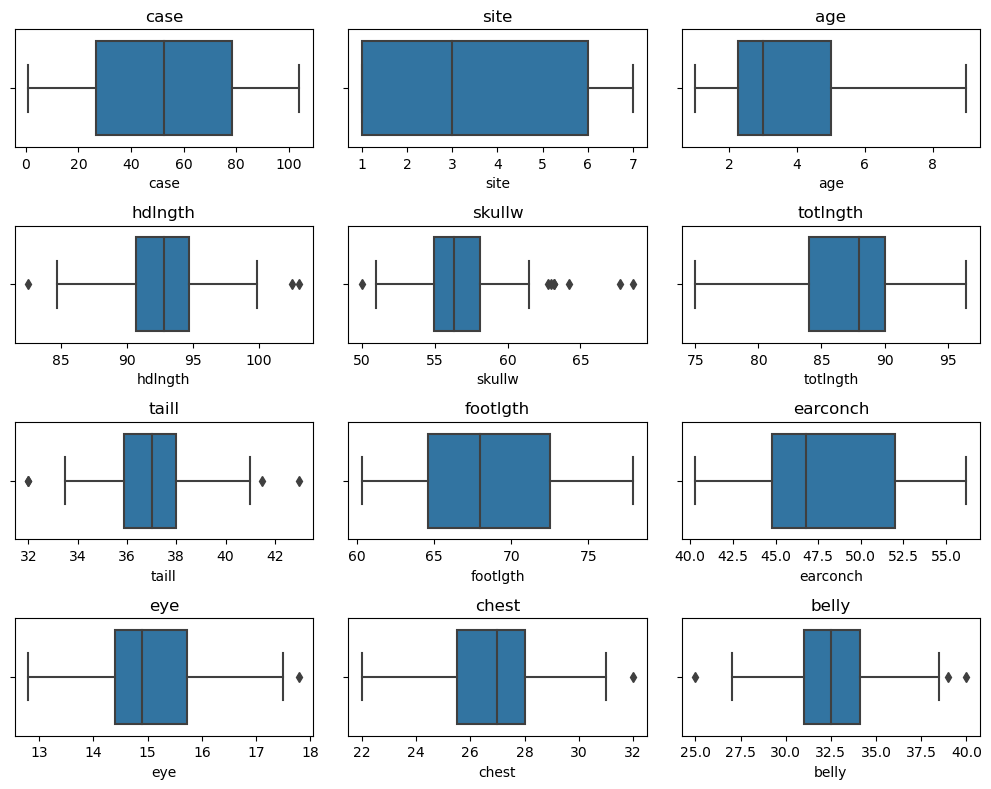

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.tight_layout()
plt.show()

There are no significant outliers to handle

In [10]:
# Dropping the "case" column

df.drop(columns=["case"], inplace=True)

## Analyzing Relationships

In [11]:
df.dtypes

site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

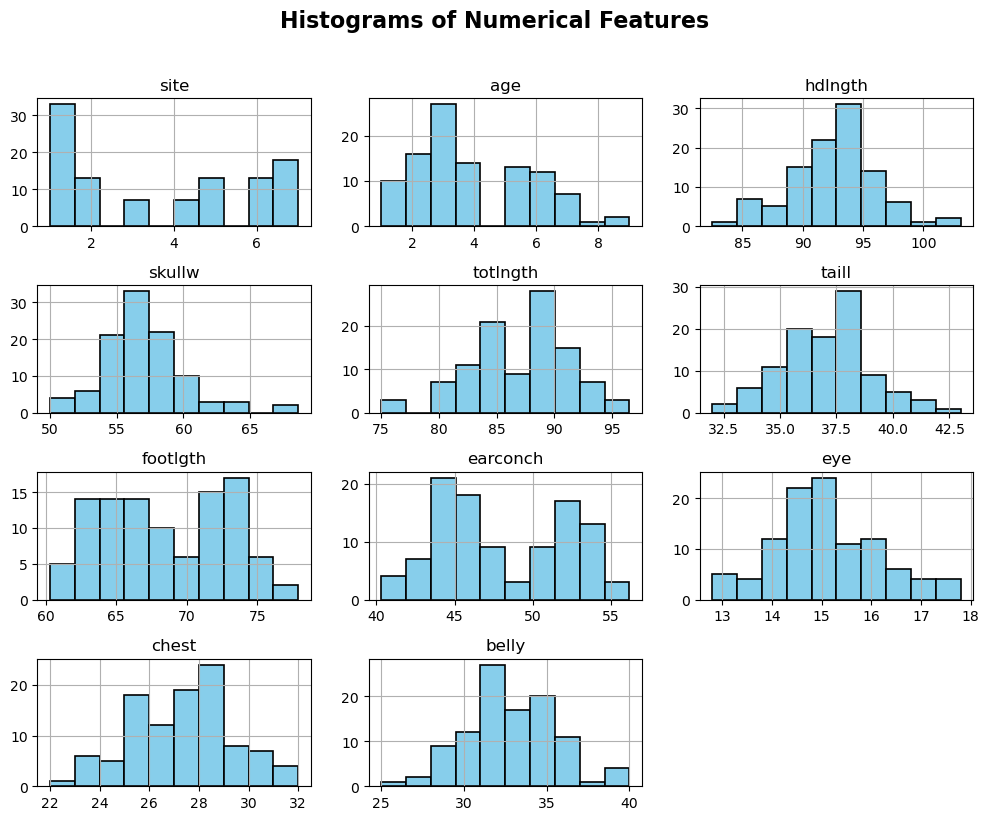

In [12]:
df.select_dtypes(include=["int64", "float64"]).hist(figsize=(10, 8), color="skyblue", edgecolor="black", linewidth=1.2)
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

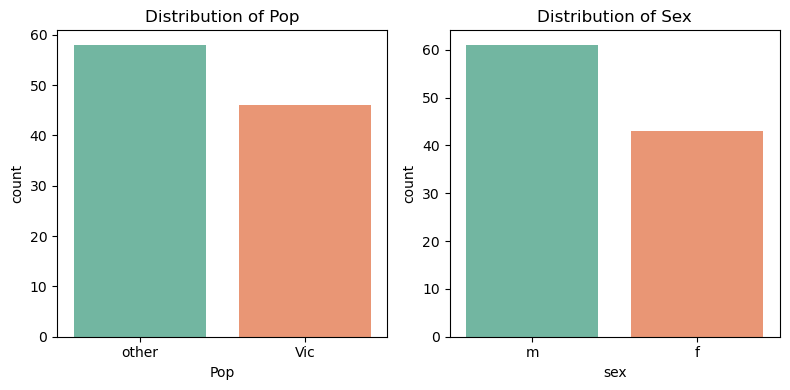

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=df, x="Pop", order=df["Pop"].value_counts().index, palette="Set2", ax=ax[0])
ax[0].set_title("Distribution of Pop")

sns.countplot(data=df, x="sex", order=df["sex"].value_counts().index, palette="Set2", ax=ax[1])
ax[1].set_title("Distribution of Sex")

plt.tight_layout()
plt.show()

In [14]:
# Correlation

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()
corr_age = corr_matrix["age"].sort_values(ascending=False)
corr_age

age         1.000000
belly       0.354298
chest       0.334209
hdlngth     0.319022
skullw      0.285107
totlngth    0.260280
eye         0.235553
footlgth    0.126190
taill       0.118241
earconch    0.053405
site       -0.131423
Name: age, dtype: float64

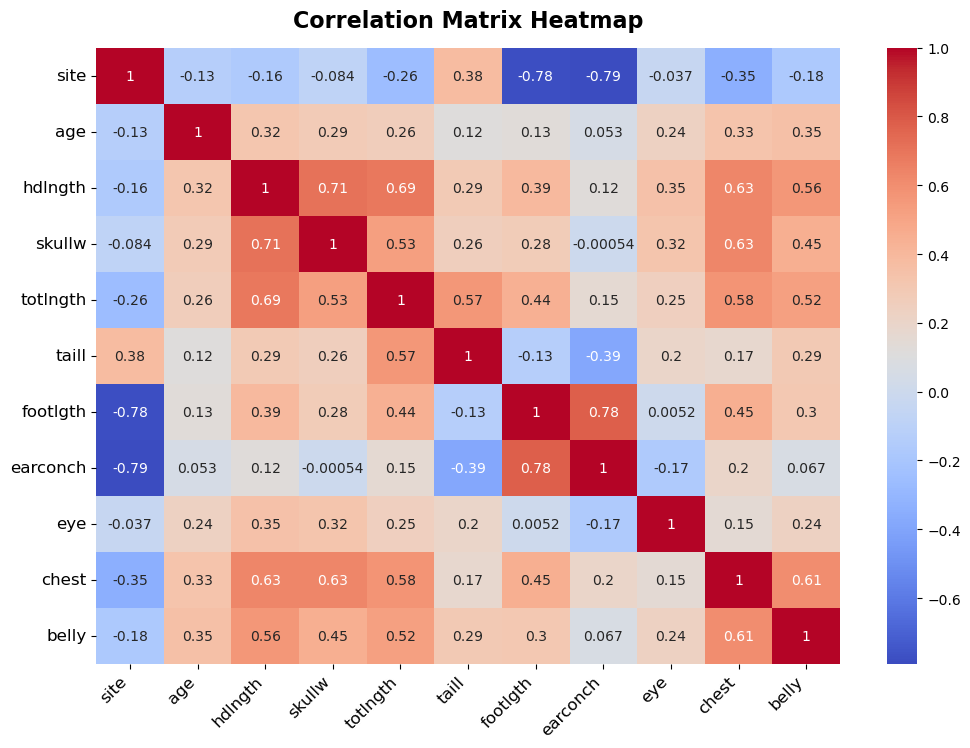

In [15]:
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold", y=1.02)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(rotation=0, fontsize=12)
plt.show()

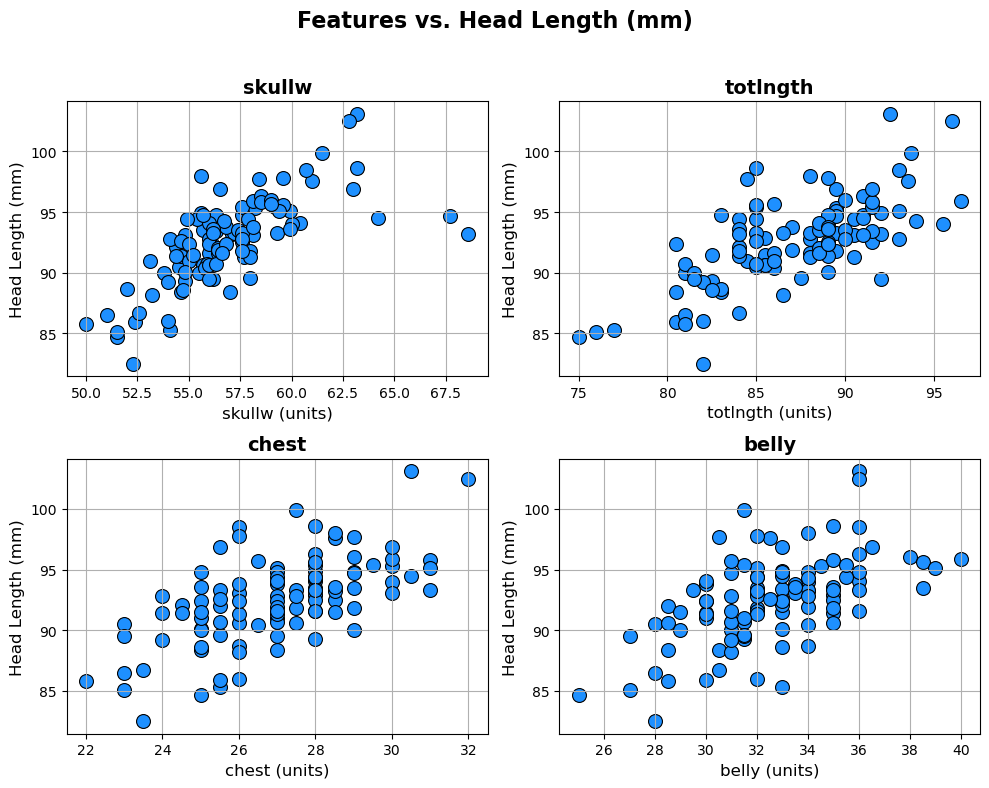

In [16]:
features = ["skullw", "totlngth", "chest", "belly"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, column in enumerate(features):
    sns.scatterplot(data=df, x=column, y="hdlngth", ax=axes[i // 2, i % 2], 
                    color='dodgerblue', marker='o', s=100, edgecolor='black')
    axes[i // 2, i % 2].set_title(column, fontweight="bold", fontsize=14)
    axes[i // 2, i % 2].set_xlabel(f"{column} (units)", fontsize=12)
    axes[i // 2, i % 2].set_ylabel("Head Length (mm)", fontsize=12)
    axes[i // 2, i % 2].grid(True)

plt.suptitle("Features vs. Head Length (mm)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()